In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#lam in Angstroms
def cal00(lam):

    rv = 4.05
    lam=lam/1e4
    return np.where(lam < 0.63,
                     2.659*(-2.156 + (1.509/lam) - (0.198/(lam**2)) + (0.011/(lam**3))) + rv,
                     2.659*(-1.857 + (1.04/lam)) + rv)

def drude(lam, index):
    eb = 0.85 - 1.9*index
    dlam = 350

    return (eb*(lam*dlam)**2)/(((lam**2)-(2175**2))**2+(lam*dlam)**2)

def bc_attenuation(lam, a1):
    return a1*(lam/5500)**(-1.0)

def dif_attenuation(lam, a2, index):
    return (a2/4.05)*(cal00(lam)+drude(lam, index))*(lam/5500)**(index)

def total_attenuation(lam, a1, a2, index):
    return bc_attenuation(lam, a1) + dif_attenuation(lam, a2, index)

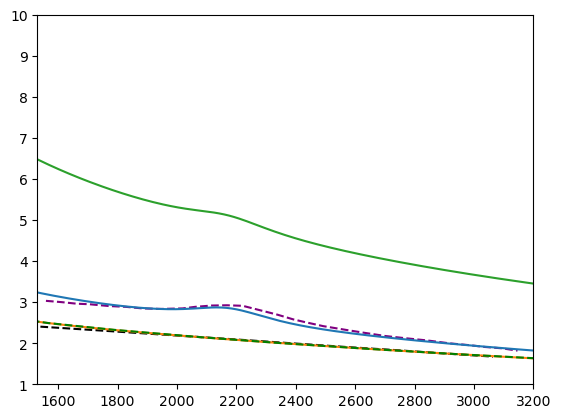

In [3]:
xcal = np.array([0.15398936170212768, 0.17313829787234045, 0.19042553191489364, 0.20638297872340428, 0.22367021276595744, 0.2401595744680851, 0.2569148936170213, 0.27367021276595743, 0.28882978723404257, 0.30638297872340425])
ycal = np.array([2.403174603174603, 2.314285714285714, 2.231746031746032, 2.1555555555555554, 2.0730158730158728, 1.9904761904761905, 1.9079365079365078, 1.831746031746032, 1.7555555555555555, 1.673015873015873])

plt.plot(xcal*1e4, ycal, ls='dashed', c='k')

xkc = np.array([0.15585106382978725, 0.16117021276595747, 0.16622340425531917, 0.17047872340425535, 0.1771276595744681, 0.18271276595744682, 0.18829787234042555, 0.1946808510638298, 0.20186170212765958, 0.20611702127659576, 0.21170212765957447, 0.21675531914893617, 0.2220744680851064, 0.22792553191489362, 0.23377659574468085, 0.23909574468085107, 0.24361702127659574, 0.24920212765957447, 0.2571808510638298, 0.26329787234042556, 0.2702127659574468, 0.2765957446808511, 0.2843085106382979, 0.29175531914893615, 0.29840425531914894, 0.30372340425531913, 0.3093085106382979, 0.3146276595744681])
ykc = np.array([3.0317460317460316, 3, 2.961904761904762, 2.9492063492063494, 2.9047619047619047, 2.8857142857142857, 2.8476190476190477, 2.8349206349206346, 2.8476190476190477, 2.8857142857142857, 2.9174603174603178, 2.923809523809524, 2.9111111111111114, 2.803174603174603, 2.6952380952380954, 2.5809523809523807, 2.5047619047619047, 2.415873015873016, 2.3206349206349204, 2.250793650793651, 2.174603174603175, 2.123809523809524, 2.0666666666666664, 1.9968253968253968, 1.9523809523809523, 1.9079365079365078, 1.8761904761904762, 1.819047619047619])

plt.plot(xkc*1e4, ykc, ls='dashed', c='purple')

lam_grid = np.linspace(1500, 3200, 200)
av = dif_attenuation(lam_grid, 1.0, -0.19)
kl = cal00(lam_grid)/4.05

tot_curve = total_attenuation(lam_grid, 1.0, 1.0, -0.1)
plt.plot(lam_grid, av)
plt.plot(lam_grid, kl)
plt.plot(lam_grid, tot_curve)
plt.ylim(1, 10)
plt.xlim(1530, 3200)


xnoll = np.array([1225.0489236790606, 1401.174168297456, 1565.5577299412917, 1788.6497064579257, 2082.1917808219177, 2340.508806262231, 2645.792563600783, 2951.0763209393344, 3350.2935420743643, 3843.4442270058707, 4313.1115459882585, 4782.778864970645, 5405.08806262231, 6039.138943248532, 6579.256360078278, 7142.857142857143, 7694.716242661449, 8129.158512720157, 8645.792563600782])
ynoll = np.array([2.9411764705882355, 2.6643598615916955, 2.491349480968858, 2.3252595155709344, 2.1453287197231834, 2.0069204152249136, 1.8615916955017302, 1.7301038062283738, 1.5778546712802768, 1.411764705882353, 1.273356401384083, 1.1557093425605536, 1.0173010380622838, 0.9065743944636678, 0.823529411764706, 0.740484429065744, 0.6712802768166091, 0.6228373702422145, 0.5743944636678201])

plt.plot(xnoll, ynoll, ls='dashed', c='green')

In [4]:
def tau_to_a(tau):
    return 2.5*np.log10(np.e)*tau

def a_to_tau(a):
    return a/(2.5*np.log10(np.e))

def sps_to_tauuv(tau1, tau2, index):
    auv = total_attenuation(1500, tau_to_a(tau1), tau_to_a(tau2), index)
    return a_to_tau(auv)

In [10]:
sps_to_tauuv(0.2, 0.25, -0.5) - sps_to_tauuv(0.2, 0.0, -0.5)

1.2305981677045539

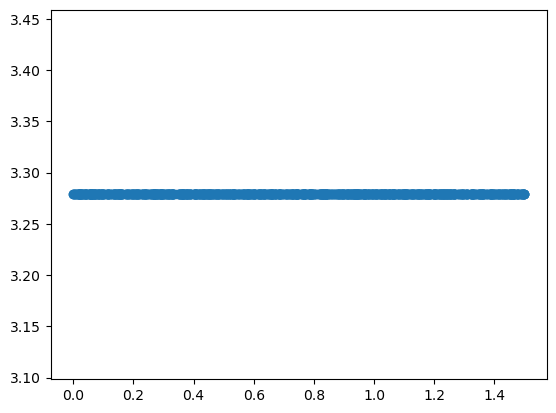

In [6]:
av2 = np.random.uniform(0, 1.5, 1000)

lam_grid = np.linspace(1500, 3200, 200)
a_fuv = dif_attenuation(1500, av2, -0.19)
a_v = dif_attenuation(5500, av2, -0.19)

fuv_slope = a_fuv/a_v

plt.scatter(a_v, fuv_slope)